In [1]:
%cd /mnt/hdd1/jkliu/Projects/ATGEmpirical/

/mnt/hdd1/jkliu/Projects/ATGEmpirical


/mnt/hdd1/jkliu/Projects/ATGEmpirical/venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from core.file_paths import *

Updated PATH: /usr/local/sbin:/usr/local/bin:/usr/sbin:/usr/bin:/sbin:/bin:/usr/games:/usr/local/games:/snap/bin:/mnt/hdd1/jkliu/Applications/ncurses  # 你自己的 ncurses 目录/bin:/mnt/hdd1/jkliu/Applications/zsh/bin:/mnt/hdd1/jkliu/Applications/Android/cmdline-tools/latest/bin:/mnt/hdd1/jkliu/Applications/Android/emulator:/mnt/hdd1/jkliu/Applications/Android/platform-tools:/mnt/hdd1/jkliu/Applications/Android/tools:/mnt/hdd1/jkliu/Applications/Android/tools/bin:/mnt/hdd1/jkliu/Applications/Android/build-tools/35.0.0
/mnt/hdd1/jkliu/Applications/Android/build-tools/35.0.0/aapt
Successfully added aapt to PATH
/mnt/hdd1/jkliu/Applications/Android/build-tools/35.0.0/aapt


'aapt'

In [3]:
apks = get_apks_list("all")

Total 750 apks
Total 113 apks after removing internet related apks


In [4]:
from core.apk_util import *
activity_list = []
for apk in apks:
    package_name, permissions, activities, exported_activities = parse_manifest_file(apk)
    activity_list.append(len(activities))
    

name: com.better.alarm.presenter.AlarmsListActivity, is_activity: True, is_permission: False
name: com.better.alarm.presenter.HandleSetAlarm, is_activity: True, is_permission: False
name: androidx.profileinstaller.ProfileInstallReceiver, is_activity: False, is_permission: False
name: com.noahjutz.gymroutines.ui.MainActivity, is_activity: True, is_permission: False
name: androidx.compose.ui.tooling.PreviewActivity, is_activity: True, is_permission: False
name: androidx.profileinstaller.ProfileInstallReceiver, is_activity: False, is_permission: False
name: org.biotstoiq.seshat.LedgerActivity, is_activity: True, is_permission: False
name: org.biotstoiq.seshat.HowToActivity, is_activity: True, is_permission: False
name: org.biotstoiq.seshat.IntroActivity, is_activity: True, is_permission: False
name: org.biotstoiq.seshat.MainActivity, is_activity: True, is_permission: False
name: com.oF2pks.chairlock.LaunchActivity, is_activity: True, is_permission: False
name: com.oF2pks.applicationsinfo.

2
43
5.0
8.265486725663717


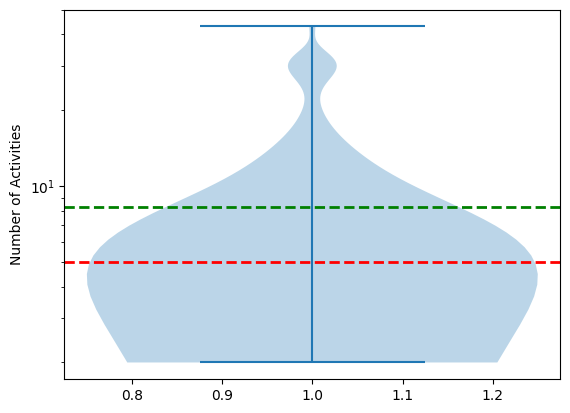

In [9]:
import numpy as np

print(min(activity_list))
print(max(activity_list))
print(np.median(activity_list))
print(np.mean(activity_list))

# violin plot tyhe number of activities
import matplotlib.pyplot as plt

plt.violinplot(activity_list)
# y: number of activities
plt.ylabel("Number of Activities")
# show median and mean
plt.axhline(np.median(activity_list), color='r', linestyle='dashed', linewidth=2)
plt.axhline(np.mean(activity_list), color='g', linestyle='dashed', linewidth=2)

# y in log scale
plt.yscale('log')
plt.show()

In [12]:
from collections import Counter
import zipfile
from concurrent.futures import ThreadPoolExecutor

executor = ThreadPoolExecutor(max_workers=80)


def get_supported_abi(apk_path: str):
    apk_file = zipfile.ZipFile(apk_path)
    # list the files under the lib directory
    lib_files = set(f.split("/")[1] for f in apk_file.namelist() if f.startswith("lib/"))
    return lib_files


abi_count = Counter()
futures = []
for apk in apks:
    futures.append(executor.submit(get_supported_abi, apk))

for future in futures:
    abis = future.result()
    if len(abis) == 0:
        continue
    print(abis)
    for abi in abis:
        abi_count[abi] += 1

print(abi_count)

{'x86', 'x86_64', 'armeabi-v7a', 'arm64-v8a'}
{'x86', 'armeabi', 'x86_64', 'arm64-v8a', 'armeabi-v7a'}
{'x86', 'x86_64', 'armeabi-v7a', 'arm64-v8a'}
{'x86', 'x86_64', 'armeabi-v7a', 'arm64-v8a'}
{'x86', 'x86_64', 'armeabi-v7a', 'arm64-v8a'}
{'x86', 'x86_64', 'armeabi-v7a', 'arm64-v8a'}
{'x86', 'x86_64', 'armeabi-v7a', 'arm64-v8a'}
{'x86', 'x86_64', 'armeabi-v7a', 'arm64-v8a'}
{'arm64-v8a'}
{'armeabi-v7a', 'arm64-v8a'}
{'x86', 'x86_64', 'armeabi-v7a', 'arm64-v8a'}
{'armeabi-v7a', 'arm64-v8a'}
{'x86', 'x86_64', 'armeabi-v7a', 'arm64-v8a'}
{'arm64-v8a'}
{'x86', 'x86_64', 'armeabi-v7a', 'arm64-v8a'}
{'x86_64'}
Counter({'arm64-v8a': 15, 'armeabi-v7a': 13, 'x86_64': 12, 'x86': 11, 'armeabi': 1})


In [19]:
import subprocess


def get_min_sdk(apk_path: str):
    cmd = f"apkanalyzer manifest min-sdk {apk_path}"
    result = subprocess.run(cmd, shell=True, stdout=subprocess.PIPE)
    if result.returncode != 0:
        print(f"Error: {apk_path}")
        return -1
    return int(result.stdout.decode("utf-8").strip())

min_sdk_count = Counter()
futures = []
for apk in apks:
    futures.append(executor.submit(get_min_sdk, apk))

for future in futures:
    min_sdk = future.result()
    min_sdk_count[min_sdk] += 1

print(min_sdk_count)
print(np.min
      (list(min_sdk_count.keys())))



Counter({21: 24, 23: 24, 19: 17, 26: 8, 15: 7, 16: 6, 14: 6, 24: 5, 17: 3, 9: 2, 11: 2, 8: 2, 18: 1, 28: 1, 30: 1, 4: 1, 22: 1, 10: 1, 25: 1})
4


[(4, 0.008928571428571428), (8, 0.026785714285714284), (9, 0.044642857142857144), (10, 0.05357142857142857), (11, 0.07142857142857142), (14, 0.125), (15, 0.1875), (16, 0.24107142857142858), (17, 0.26785714285714285), (18, 0.2767857142857143), (19, 0.42857142857142855), (21, 0.6428571428571429), (22, 0.6517857142857143), (23, 0.8660714285714286), (24, 0.9107142857142857), (25, 0.9196428571428571), (26, 0.9910714285714286), (28, 1.0), (30, 1.0089285714285714)]


/tmp/ipykernel_2300157/35492451.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in vals])


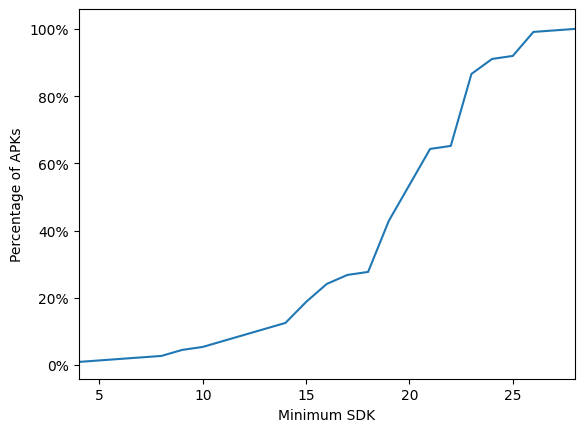

In [30]:
# accumulate the number of apks with min sdk
min_sdk_count_sorted = sorted(min_sdk_count.items())
min_sdk_count_list = [(k, sum(v for k1, v in min_sdk_count_sorted if k1 <= k)/112) for k, _ in min_sdk_count_sorted]
print(min_sdk_count_list)
#plot the number of apks with min sdk
import matplotlib.pyplot as plt

plt.plot([k for k, _ in min_sdk_count_list], [v for _, v in min_sdk_count_list])
plt.xlabel("Minimum SDK")
plt.ylabel("Percentage of APKs")
#x range from 4 to 28
plt.xlim(4, 28)
# y in percentage %
vals = plt.gca().get_yticks()
plt.gca().set_yticklabels(['{:,.0%}'.format(x) for x in vals])

plt.show()